## Fake News Classifier Using LSTM


In [1]:
#import the libraries

import pandas as pd
import seaborn as sns

In [2]:
#import the dataset

df=pd.read_csv('news-dataset.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

In [5]:
#check for null values

df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
###Drop Nan Values

df=df.dropna()

In [7]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [9]:
## Get the Dependent features
y=df['label']

In [10]:
X.shape

(18285, 4)

In [11]:
y.shape

(18285,)

In [12]:
## Check the balance of the data

y.value_counts()

0    10361
1     7924
Name: label, dtype: int64

C:\Users\Subrat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

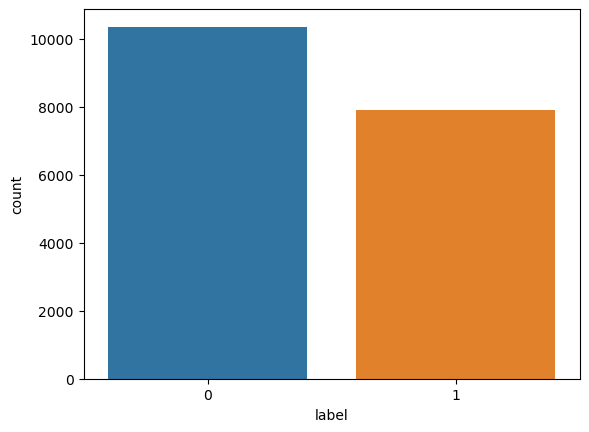

In [13]:
sns.countplot(y)

In [14]:
import tensorflow as tf

In [15]:
tf.__version__

'2.10.0'

In [16]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


In [17]:
### Vocabulary size

voc_size=5000

### Onehot Representation

In [18]:
messages= X.copy()

In [19]:
messages['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [20]:
messages

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [21]:
#Reset the indexes
messages.reset_index(inplace=True)

In [22]:
messages

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [23]:
import nltk
import re
from nltk.corpus import stopwords

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Subrat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Dataset Preprocessing

In [25]:
##stemming
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [26]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [27]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

### One Hot Encoding

In [28]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[3357, 3959, 3662, 784, 3360, 2989, 2168, 1366, 3338, 3783],
 [1722, 1671, 4151, 2778, 3098, 642, 3293],
 [503, 1326, 2672, 261],
 [4280, 1348, 1271, 430, 1314, 4463],
 [1598, 3098, 2491, 2869, 2972, 3113, 3098, 3239, 2108, 3929],
 [4227,
  2131,
  353,
  1030,
  2115,
  2132,
  2135,
  110,
  3665,
  3647,
  2062,
  2133,
  14,
  3516,
  3293],
 [25, 1847, 4038, 1935, 2688, 2606, 2161, 3142, 3855, 4931, 3196],
 [3030, 892, 3259, 3100, 1377, 25, 2132, 64, 3855, 4931, 3196],
 [597, 2675, 3851, 2578, 776, 4896, 4401, 4294, 2132, 38],
 [3345, 4654, 2587, 4767, 1291, 553, 1742, 3569],
 [286, 4064, 788, 2184, 2935, 81, 4059, 2696, 4078, 366, 1958],
 [430, 515, 3360, 4896, 2132, 1377],
 [1603, 1891, 4267, 1491, 2775, 621, 902, 1663, 125],
 [2121, 3872, 2018, 3828, 2237, 167, 3911, 3855, 4931, 3196],
 [2, 2598, 218, 4034, 2301, 3855, 4931, 3196],
 [4780, 4930, 3480, 3688, 3442, 4123, 1460, 4216, 2702, 1583],
 [1866, 934, 1671],
 [2912, 912, 2000, 2292, 2132, 2411, 868, 3293],
 [1642, 46, 415

In [29]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [30]:
onehot_repr[1]

[1722, 1671, 4151, 2778, 3098, 642, 3293]

### Embedding Representation

In [31]:
sent_length=20
embedded_docs= pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[3357 3959 3662 ...    0    0    0]
 [1722 1671 4151 ...    0    0    0]
 [ 503 1326 2672 ...    0    0    0]
 ...
 [ 144 3761  848 ...    0    0    0]
 [4234 1377  708 ...    0    0    0]
 [4859 1466  788 ...    0    0    0]]


In [32]:
embedded_docs[1]

array([1722, 1671, 4151, 2778, 3098,  642, 3293,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [33]:
embedded_docs[0]

array([3357, 3959, 3662,  784, 3360, 2989, 2168, 1366, 3338, 3783,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

### Model Building

In [66]:
embedding_vector_features=40 ##features representation

model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_3 (LSTM)               (None, 100)               56400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
len(embedded_docs),y.shape

(18285, (18285,))

In [68]:
embedded_docs

array([[3357, 3959, 3662, ...,    0,    0,    0],
       [1722, 1671, 4151, ...,    0,    0,    0],
       [ 503, 1326, 2672, ...,    0,    0,    0],
       ...,
       [ 144, 3761,  848, ...,    0,    0,    0],
       [4234, 1377,  708, ...,    0,    0,    0],
       [4859, 1466,  788, ...,    0,    0,    0]])

In [69]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [70]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [71]:
X_final

array([[3357, 3959, 3662, ...,    0,    0,    0],
       [1722, 1671, 4151, ...,    0,    0,    0],
       [ 503, 1326, 2672, ...,    0,    0,    0],
       ...,
       [ 144, 3761,  848, ...,    0,    0,    0],
       [4234, 1377,  708, ...,    0,    0,    0],
       [4859, 1466,  788, ...,    0,    0,    0]])

In [72]:
#Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

### Model Training

In [73]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 4s 14ms/step - loss: 0.3176 - accuracy: 0.8389 - val_loss: 0.2154 - val_accuracy: 0.9130
Epoch 2/10
192/192 [==============================] - 2s 12ms/step - loss: 0.1321 - accuracy: 0.9496 - val_loss: 0.1968 - val_accuracy: 0.9180
Epoch 3/10
192/192 [==============================] - 2s 12ms/step - loss: 0.0811 - accuracy: 0.9700 - val_loss: 0.2315 - val_accuracy: 0.9143
Epoch 4/10
192/192 [==============================] - 2s 13ms/step - loss: 0.0553 - accuracy: 0.9807 - val_loss: 0.2830 - val_accuracy: 0.9094
Epoch 5/10
192/192 [==============================] - 2s 13ms/step - loss: 0.0359 - accuracy: 0.9882 - val_loss: 0.3138 - val_accuracy: 0.9112
Epoch 6/10
192/192 [==============================] - 2s 13ms/step - loss: 0.0286 - accuracy: 0.9900 - val_loss: 0.2975 - val_accuracy: 0.9054
Epoch 7/10
192/192 [==============================] - 2s 12ms/step - loss: 0.0235 - accuracy: 0.9927 - val_loss: 0.4776 - val_accuracy: 0.9036

### Performance Metrics And Accuracy

In [74]:
y_pred = model.predict(X_test)

189/189 [==============================] - 1s 2ms/step


In [75]:
y_pred = np.where(y_pred > 0.5, 1,0)

In [63]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(y_test,y_pred)

array([[3103,  316],
       [ 225, 2391]], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9103562551781276

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3419
           1       0.88      0.91      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035

